<a href="https://colab.research.google.com/github/liubruce11/BA820-TeamB7/blob/emily-pet-cats/M2_Emily_Su_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BA820 Project Proposal EDA**

**Bob Ross Paintings**

Team B7: Alen Chiu, Bruce Liu, Erica Kim, Emily Su

#**1. Data Overview**

In [ ]:
# import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# pulls dataset
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-02-21/bob_ross.csv"

bob_ross = pd.read_csv(url)

In [ ]:
# View basic structure
bob_ross.head()

# Dataset dimensions
bob_ross.shape

# Column info
bob_ross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   painting_index    403 non-null    int64 
 1   img_src           403 non-null    object
 2   painting_title    403 non-null    object
 3   season            403 non-null    int64 
 4   episode           403 non-null    int64 
 5   num_colors        403 non-null    int64 
 6   youtube_src       403 non-null    object
 7   colors            403 non-null    object
 8   color_hex         403 non-null    object
 9   Black_Gesso       403 non-null    bool  
 10  Bright_Red        403 non-null    bool  
 11  Burnt_Umber       403 non-null    bool  
 12  Cadmium_Yellow    403 non-null    bool  
 13  Dark_Sienna       403 non-null    bool  
 14  Indian_Red        403 non-null    bool  
 15  Indian_Yellow     403 non-null    bool  
 16  Liquid_Black      403 non-null    bool  
 17  Liquid_Clear    

In [ ]:
# Check missing values
bob_ross.isnull().sum().sort_values(ascending=False)

# Overview of dataset
bob_ross.describe(include="all")




,painting_index,img_src,painting_title,season,episode,num_colors,youtube_src,colors,color_hex,Black_Gesso,...,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
count,403.000000,403,403,403.00000,403.000000,403.000000,403,403,403,403,...,403,403,403,403,403,403,403,403,403,403
unique,NaN,403,401,NaN,NaN,NaN,403,176,175,2,...,2,2,2,2,2,2,2,2,2,2
top,NaN,https://www.twoinchbrush.com/images/painting41...,Mountain Waterfall,NaN,NaN,NaN,https://www.youtube.com/embed/nJGCVFn57U8,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#5F2E1F', '...",False,...,False,True,True,False,True,True,True,True,True,True
freq,NaN,1,2,NaN,NaN,NaN,1,46,46,302,...,352,317,323,287,263,306,400,371,327,380
mean,208.712159,NaN,NaN,16.00000,7.000000,10.605459,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,117.901728,NaN,NaN,8.95539,3.746308,2.378525,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.000000,NaN,NaN,1.00000,1.000000,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,107.500000,NaN,NaN,8.00000,4.000000,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,210.000000,NaN,NaN,16.00000,7.000000,11.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,310.500000,NaN,NaN,24.00000,10.000000,12.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **2. EDA**

## **Question 1:** What latent palette archetypes emerge when paintings are represented by color co-occurrence rather than individual colors?

### Color Frequency Analysis

**Findings**

- A small subset of colors appears in the majority of paintings, while many colors are used infrequently.

- Color usage is highly imbalanced rather than evenly distributed across the palette.

- This establishes a baseline that motivates examining relationships between colors rather than treating all colors equally.

In [ ]:
# Identify color columns (binary indicators)
color_cols = [
    col for col in bob_ross.columns
    if col not in [
        "painting_index", "img_src", "painting_title",
        "season", "episode", "num_colors",
        "youtube_src", "colors", "color_hex"
    ]
]

# Sum TRUE values to get frequency per color
color_freq = (
    bob_ross[color_cols]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

color_freq.columns = ["color", "count"]

# Add percentage
color_freq["percent"] = color_freq["count"] / len(bob_ross) * 100

color_freq.head()


,color,count,percent
0,Titanium_White,400,99.255583
1,Alizarin_Crimson,380,94.292804
2,Van_Dyke_Brown,371,92.059553
3,Cadmium_Yellow,346,85.856079
4,Yellow_Ochre,327,81.141439


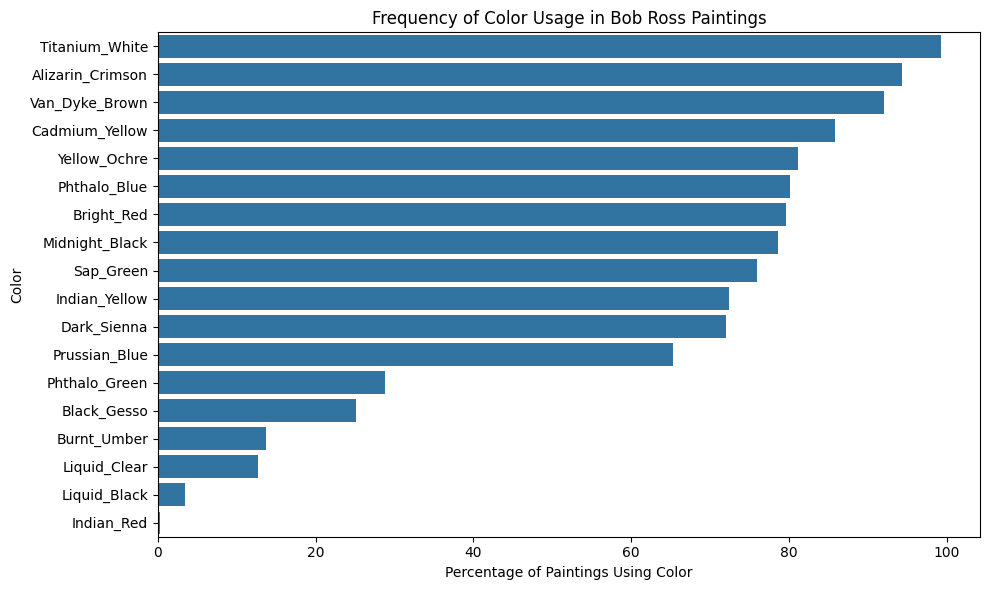

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=color_freq,
    y="color",
    x="percent"
)
plt.xlabel("Percentage of Paintings Using Color")
plt.ylabel("Color")
plt.title("Frequency of Color Usage in Bob Ross Paintings")
plt.tight_layout()
plt.show()


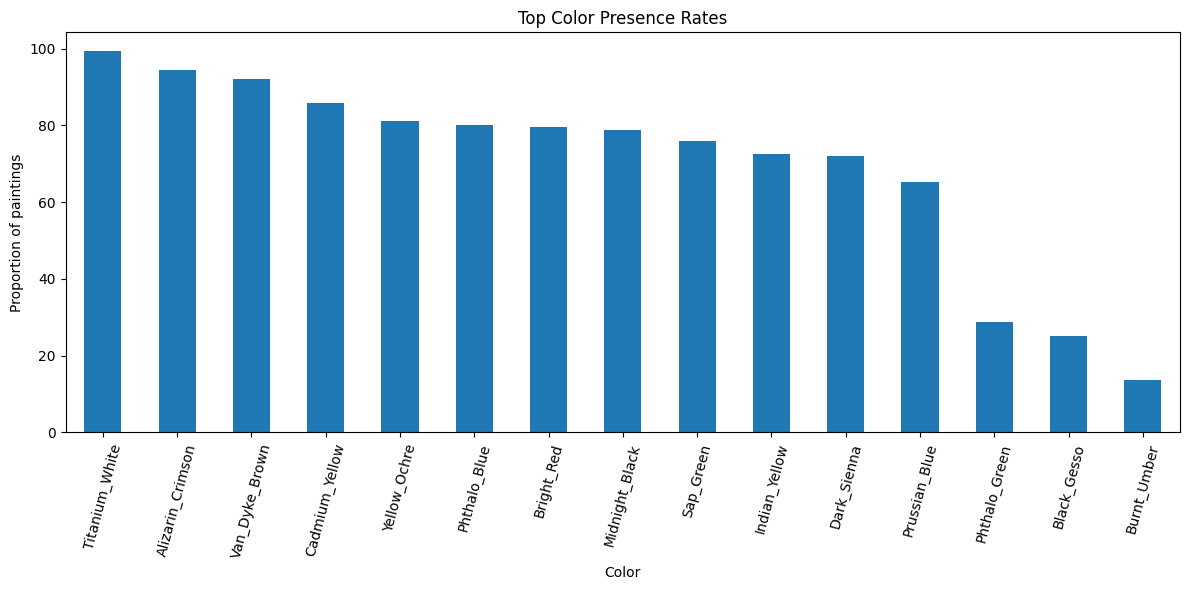

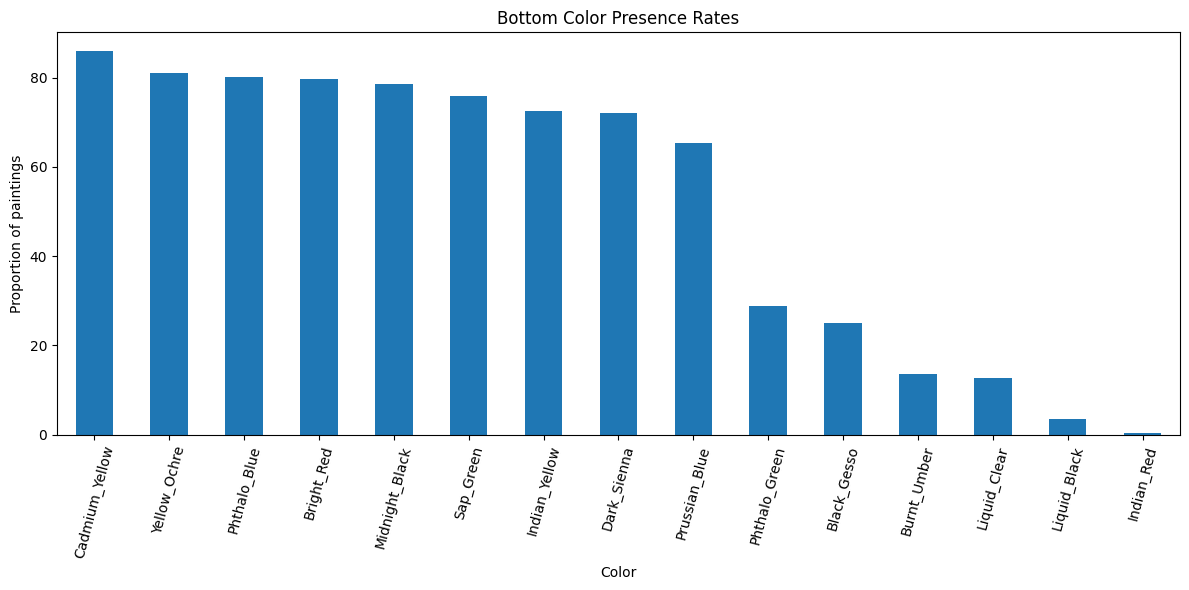

In [ ]:
top_n = 15
bottom_n = 15

plt.figure(figsize=(12, 6))
color_freq.head(top_n).set_index('color')['percent'].plot(kind='bar')
plt.title('Top Color Presence Rates')
plt.xlabel('Color')
plt.ylabel('Proportion of paintings')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
color_freq.tail(bottom_n).set_index('color')['percent'].plot(kind='bar')
plt.title('Bottom Color Presence Rates')
plt.xlabel('Color')
plt.ylabel('Proportion of paintings')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

### Color Co-Occurrence Patterns

**Findings**

- Several colors frequently appear together across paintings, indicating non-independent color usage.

- High co-occurrence is concentrated among specific color pairs rather than spread uniformly.

- These patterns suggest structured color combinations beyond marginal usage frequencies.

In [ ]:
# Extracting color indicator columns
color_cols = [
    col for col in bob_ross.columns
    if col not in [
        "painting_index", "img_src", "painting_title",
        "season", "episode", "num_colors",
        "youtube_src", "colors", "color_hex"
    ]
]

color_matrix = bob_ross[color_cols].astype(int)


In [ ]:
# Co-occurrence matrix (how often two colors appear together)
co_occurrence = color_matrix.T @ color_matrix


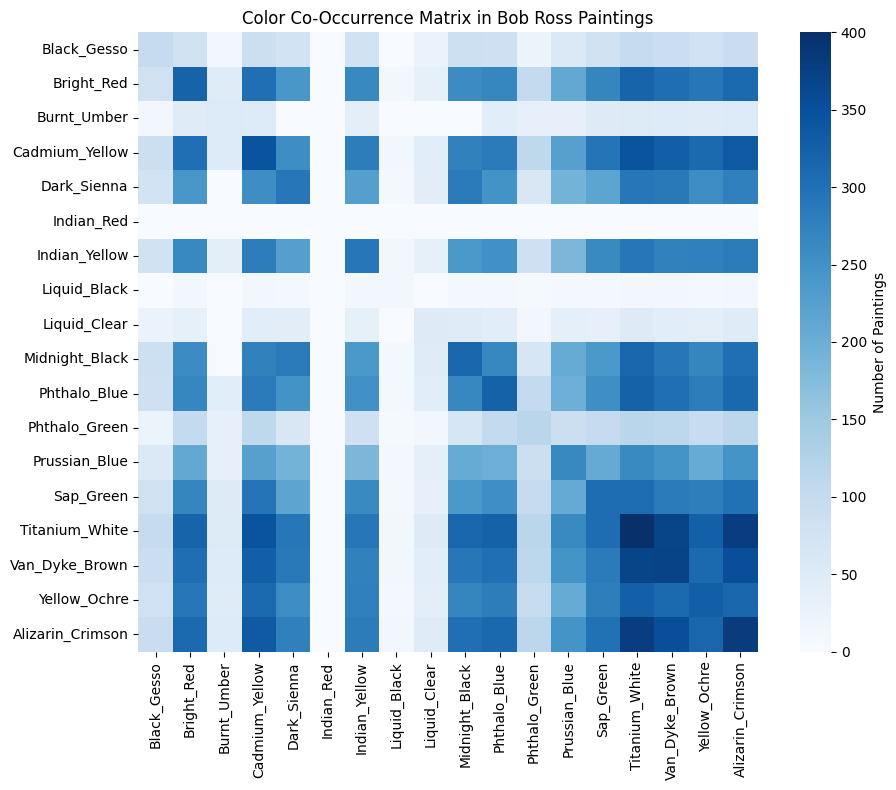

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    co_occurrence,
    cmap="Blues",
    square=True,
    cbar_kws={"label": "Number of Paintings"}
)
plt.title("Color Co-Occurrence Matrix in Bob Ross Paintings")
plt.tight_layout()
plt.show()


### Strongest Co-occuring Colors

In [ ]:
# Remove self-pairs
co_pairs = (
    co_occurrence
    .where(~np.eye(co_occurrence.shape[0], dtype=bool))
    .stack()
    .reset_index()
)

co_pairs.columns = ["color_1", "color_2", "count"]

# Strongest pairing color pairs
co_pairs.sort_values("count", ascending=False).head(10)


,color_1,color_2,count
303,Alizarin_Crimson,Titanium_White,378.0
254,Titanium_White,Alizarin_Crimson,378.0
269,Van_Dyke_Brown,Titanium_White,369.0
252,Titanium_White,Van_Dyke_Brown,369.0
304,Alizarin_Crimson,Van_Dyke_Brown,354.0
271,Van_Dyke_Brown,Alizarin_Crimson,354.0
241,Titanium_White,Cadmium_Yellow,345.0
64,Cadmium_Yellow,Titanium_White,345.0
292,Alizarin_Crimson,Cadmium_Yellow,335.0
67,Cadmium_Yellow,Alizarin_Crimson,335.0


## Question 2: How many distinct levels of palette complexity exist in the dataset, and do these levels correspond to qualitatively different painting styles?

## Question 4: What role do paintings with very small or very large palettes play in understanding stylistic variation within broader palette structures?

### Palette Size Distribution

**Findings**

- Palette size varies substantially across paintings, with most clustered around moderate complexity.

- Clear low- and high-complexity extremes are present in the distribution.

- Extreme palette sizes appear across multiple seasons rather than being concentrated in a single period.

In [ ]:
# Summary statistics for number of colors
bob_ross["num_colors"].describe()


,num_colors
count,403.000000
mean,10.605459
std,2.378525
min,1.000000
25%,9.000000
50%,11.000000
75%,12.000000
max,15.000000


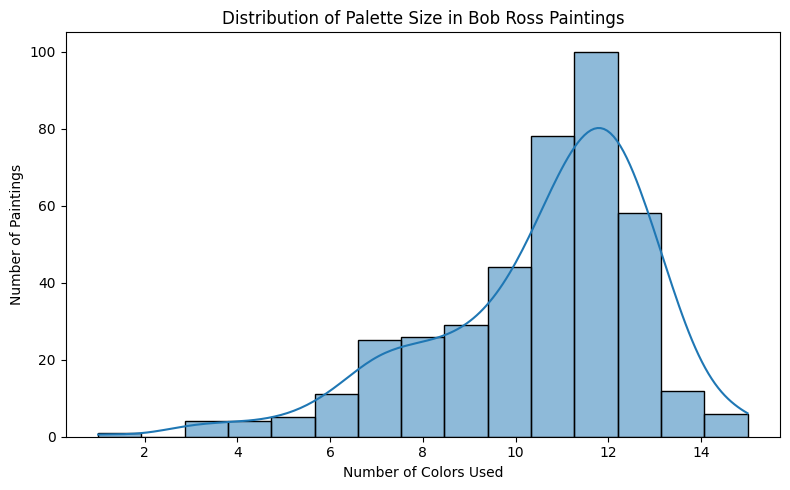

In [ ]:
# Histogram of palette sizes
plt.figure(figsize=(8, 5))
sns.histplot(
    bob_ross["num_colors"],
    bins=15,
    kde=True
)
plt.xlabel("Number of Colors Used")
plt.ylabel("Number of Paintings")
plt.title("Distribution of Palette Size in Bob Ross Paintings")
plt.tight_layout()
plt.show()


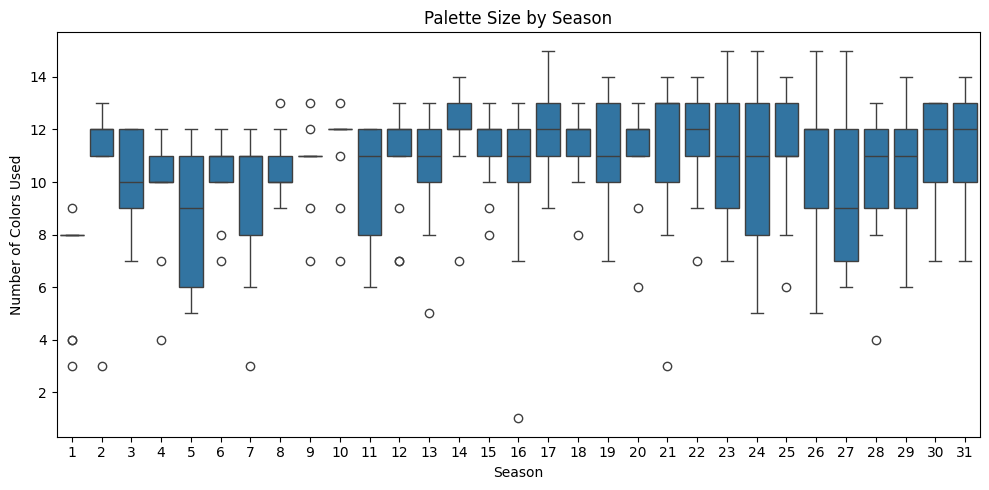

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=bob_ross,
    x="season",
    y="num_colors"
)
plt.xlabel("Season")
plt.ylabel("Number of Colors Used")
plt.title("Palette Size by Season")
plt.tight_layout()
plt.show()


## **Question 3:** Are stylistic differences better explained by palette structure than by time (season or episode order)?

**Findings**

- Average palette size fluctuates across seasons without a monotonic increase or decrease.

- Core colors remain consistently used over time.

- This contrast suggests stylistic variation may not be primarily driven by chronological progression.

### Seasonal Trends

In [ ]:
palette_by_season = (
    bob_ross
    .groupby("season")["num_colors"]
    .agg(["mean", "median"])
    .reset_index()
)

palette_by_season.head()


,season,mean,median
0,1,7.076923,8.0
1,2,11.153846,12.0
2,3,9.846154,10.0
3,4,10.000000,10.0
4,5,8.538462,9.0


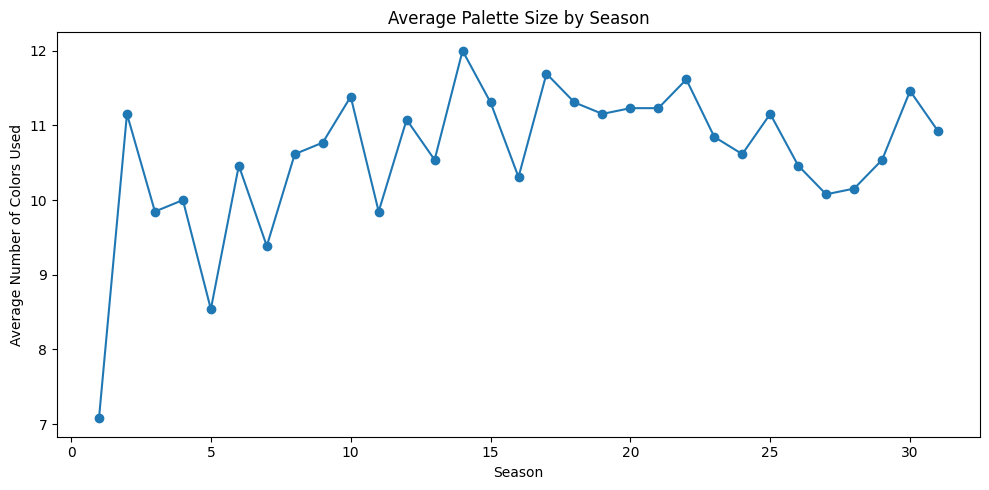

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(palette_by_season["season"], palette_by_season["mean"], marker="o")
plt.xlabel("Season")
plt.ylabel("Average Number of Colors Used")
plt.title("Average Palette Size by Season")
plt.tight_layout()
plt.show()


### Color Usage over time on core colors

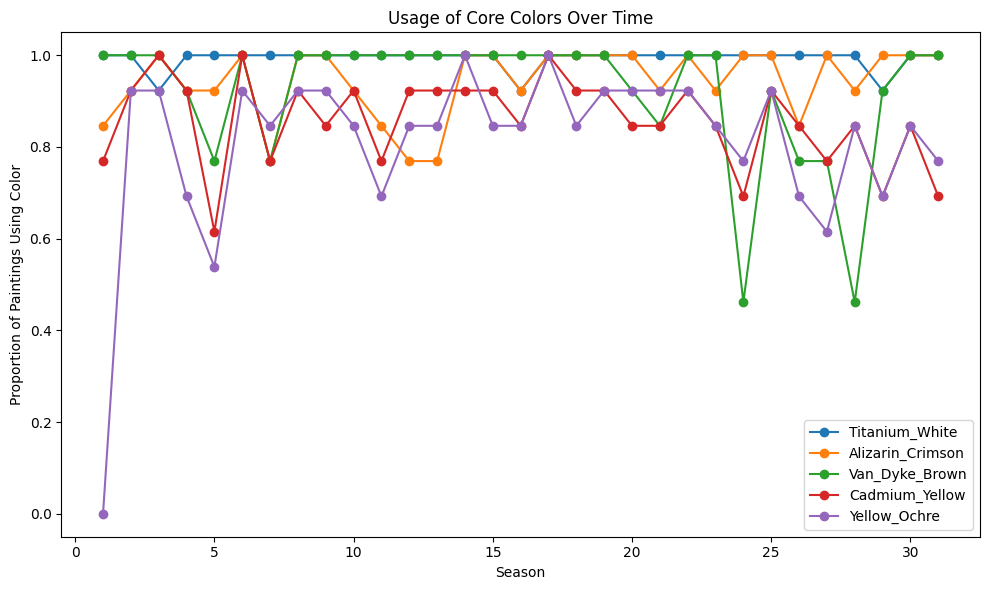

In [ ]:
core_colors = [
    "Titanium_White",
    "Alizarin_Crimson",
    "Van_Dyke_Brown",
    "Cadmium_Yellow",
    "Yellow_Ochre"
]

color_trends = (
    bob_ross
    .groupby("season")[core_colors]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 6))
for color in core_colors:
    plt.plot(
        color_trends["season"],
        color_trends[color],
        marker="o",
        label=color
    )

plt.xlabel("Season")
plt.ylabel("Proportion of Paintings Using Color")
plt.title("Usage of Core Colors Over Time")
plt.legend()
plt.tight_layout()
plt.show()


#### Based on the EDA, the analysis focuses on season, episode, palette size, and selected color indicators that capture stylistic complexity and color usage patterns.